<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Xử-lý-Thiên Lệch Thiếu Biến" data-toc-modified-id="Xử-lý-Thiên Lệch Thiếu Biến-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Xử lý Thiên Lệch Thiếu Biến</a></span></li><li><span><a href="#Quý-của-Ngày-sinh-và-Tác-động-của-Giáo-dục-lên-Tiền-lương" data-toc-modified-id="Quý-của-Ngày-sinh-và-Tác-động-của-Giáo-dục-lên-Tiền-lương-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Quý của Ngày sinh và Tác động của Giáo dục lên Tiền lương</a></span></li><li><span><a href="#1st-Stage" data-toc-modified-id="1st-Stage-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bước 1</a></span></li><li><span><a href="#Dạng Tối Giản" data-toc-modified-id="Dạng Tối Giản-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dạng Tối Giản</a></span></li><li><span><a href="#Tính-toán-Biến Công Cụ-bằng-tay" data-toc-modified-id="Tính-toán-Biến Công Cụ-bằng-tay-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tính toán Biến Công Cụ bằng tay</a></span></li><li><span><a href="#Đa Biến Công Cụ" data-toc-modified-id="Đa Biến Công Cụ-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Đa Biến Công Cụ</a></span></li><li><span><a href="#Điểm-yếu-của-Biến công cụ" data-toc-modified-id="Điểm-yếu-của-Biến công cụ-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Điểm yếu của Biến công cụ</a></span></li><li><span><a href="#Ý-tưởng-chủ-đạo" data-toc-modified-id="Ý-tưởng-chủ-đạo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ý tưởng chủ đạo</a></span></li><li><span><a href="#Tài-liệu-tham-khảo" data-toc-modified-id="Tài-liệu-tham-khảo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Tài liệu tham khảo</a></span></li></ul></div>

# Xử lý Thiên Lệch Thiếu Biến

Một phương pháp để kiểm soát OVB [Thiên lệch Thiếu biến] là đưa biến thiếu vào mô hình. Tuy nhiên, điều này không phải lúc nào cũng khả thi, nhiều khi đơn giản chỉ vì chúng ta không có dữ liệu về các biến thiếu. Ví dụ, hãy quay lại với mô hình về tác động của giáo dục đối với tiền lương:

$
log(LươngGiờ)_i = \beta_0 + \kappa \ HọcVấn_i + \pmb{\beta}NăngLực_i + u_i
$

Để xác định tác động nhân quả của giáo dục \\(\kappa\\) đối với \\(log(LươngGiờ)\\), chúng ta cần kiểm soát \\(NăngLực_i\\), nếu không muốn thiên lệch. Sau cùng, năng lực cũng có thể là một biến nhiễu, tác động đến cả can thiệp (giáo dục) và kết quả (thu nhập).

In [62]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr

%matplotlib inline

pd.set_option("display.max_columns", 5)
style.use("fivethirtyeight")

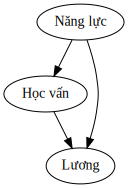

In [63]:
g = gr.Digraph()
g.edge("Năng lực", "Học vấn")
g.edge("Năng lực", "Lương")
g.edge("Học vấn", "Lương")
g

Một cách để tránh điều này là  kiểm soát và cố định năng lực khi đo lường tác động của giáo dục đối với tiền lương. Muốn thế, chúng ta có thể bổ sung năng lực vào mô hình hồi quy tuyến tính. Tuy nhiên, chúng ta không có dữ liệu về năng lực. Cái tốt nhất chúng ta có là một số biến đại diện gây tranh cãi, như kiểu IQ.

Nhưng không hẳn tuyệt vọng. Đây là lúc chúng ta cần đến các Biến Công Cụ. Ý tưởng IV là tìm một biến nào đó gây ra can thiệp và nó chỉ có tương quan với kết quả thông qua can thiệp. Nói cách khác, biến công cụ \\(Z_i\\) này không tương quan với \\(Y_0\\), nhưng có tương quan với \\(T\\). Cái này đôi khi được gọi là điều kiện loại trừ.

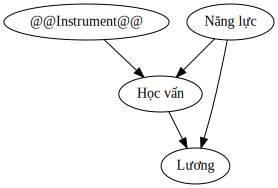

In [64]:
g = gr.Digraph()

g.edge("Năng lực", "Học vấn")
g.edge("Năng lực", "Lương")
g.edge("Học vấn", "Lương")
g.edge("Biến công cụ", "Học vấn")
g

Nếu chúng ta tìm được một biến như thế, chúng ta có thể đánh giá tác động nhân quả \\(\kappa\\) với công thức IV. Muốn vậy, hãy nghĩ về phương trình lí tưởng mà chúng ta muốn hồi quy. Dùng các kí hiệu khái quát như \\(T\\) cho can thiệp và \\(W\\) cho các biến nhiễu, chúng ta muốn hồi quy:
$
Y_i = \beta_0 + \kappa \ T_i + \pmb{\beta}W_i + u_i
$

Nhưng chúng ta không có dữ liệu về \\(W\\), nên chúng ta chỉ có thể chạy hồi quy:

$
Y_i = \beta_0 + \kappa\ T_i + v_i
$

$
v_i = \pmb{\beta}W_i + u_i
$

Vì \\(W\\) là một biến nhiễu, \\(Cov(T, v) \neq 0\\). Chúng ta có một phương trình thiếu thay vì một phương trình đủ. Trong ví dụ của chúng ta, có khả năng năng lực có tương quan với học vấn. Nếu điều này xảy ra, việc chạy hồi quy thiếu có thể tạo ra biased estimator cho  \\(\kappa\\) do các biến thiếu.

Nào, bây giờ hãy xem điều kì diệu với IV! Vì biến công cụ Z  chỉ có tương quan với kết quả thông qua T, điều này hàm ý \\(Cov(Z,v) = 0\\), nếu không sẽ có con đường thứ hai dẫn từ Z tới Y thông qua W. Ghi nhớ điều này, chúng ta có thể viết:

$
Cov(Z,Y) = Cov(Z,\beta_0 + \kappa\ T_i + v_i) = \kappa Cov(Z,T) + Cov(Z, v) = \kappa Cov(Z,T)
$

Chia cả 2 vế cho \\(V(Z_i)\\) và sắp xếp lại, chúng ta thu được:

$
\kappa = \dfrac{Cov(Y_i, Z_i)/V(Z_i)}{Cov(T_i, Z_i)/V(Z_i)} = \dfrac{\text{Dạng Tối Giản (hệ số)}}{\text{Bước 1 (hệ số)}} 
$

Lưu ý cả tử số và mẫu số là các hệ số hồi quy (các hiệp phương sai chia cho các  phương sai). Tử số là kết quả của việc chạy hồi quy Y trên Z. Nói cách khác, nó là "tác động" của Z đối với Y. Nhớ là điều này không nói rằng Z gây ra Y, vì chúng ta có một yêu cầu rằng Z tác động lên Y chỉ thông qua T. Tử số này nổi tiếng đến nỗi nó có tên riêng: hệ số phương trình dạng tối giản.

Mẫu số cũng là một hệ số hồi quy. Lần này là hồi quy T trên Z. Hồi quy này phản ánh tác động của Z lên T và nó cũng rất nổi tiếng với tên gọi Bước 1. 

Một cách khá ngầu khác là nhìn phương trình này dưới góc độ đạo hàm riêng. Chúng ta có thể chỉ ra rằng tác động của T đối với Z bằng tác động của Z lên Y, nhân với tác động của Z lên T:

$
\kappa = \dfrac{\frac{\partial y}{\partial z}}{\frac{\partial T}{\partial z}} = \dfrac{\partial y}{\partial z} * \dfrac{\partial z}{\partial T} =  \dfrac{\partial y}{\partial T}
$

Thông điệp của phương trình này đẹp và ngầu hơn mọi người tưởng. Biểu diễn IV dưới dạng này, chúng ta nói: "nhìn này, thật khó để có thể xác định tác động của T đối với Y do các biến nhiễu. Nhưng tôi có thể dễ dàng xác định tác động của Z lên Y, vì không có gì tác động lên cả Z và Y (điều kiện loại trừ). Tuy nhiên, tôi quan tâm đến tác động của T đối với Y, không phải Z đối với Y. Vì thế tôi ước lượng tác động của Z lên Y và **chia nó cho tác động của Z lên T**, để chuyển đổi tác động của T đơn vị thay vì Z đơn vị". 

Chúng ta cũng có thể xem xét một trường hợp đơn giản với biến công cụ là một biến giả. Trong trường hợp này, IV estimator chỉ đơn giản là tỉ số giữa hiệu của các kì vọng.

$
\kappa = \dfrac{E[Y|Z=1]-E[Y|Z=0]}{E[T|Z=1]-E[T|Z=0]}
$

Tỉ số này đôi khi được gọi là **Mô Hình Ước Lượng Wald**. Một lần nữa chúng ta có thể kể câu chuyện về IV khi chúng ta muốn xem tác động của T lên Y, nhưng điều này quá khó. Vì thế, chúng ta tập trung vào tác động của Z lên Y, điều này dễ hơn. Theo định nghĩa, Z chỉ tác động Y qua T, nên chúng ta cần chuyển đổi tác động của Z lên Y thành tác động của T lên Y. 

# Quý của Ngày sinh và Tác động của Giáo dục lên Tiền lương
Trên đây chúng ta đã sử dụng các biến công cụ \\(Z\\) với đặc tính thần kì chỉ tác động lên kết quả thông qua can thiệp. Thú thật rất khó kiếm được biến công cụ thần kì đến thế. Nó không dành cho những kẻ yếu tim. Thiên hạ đồn đại rằng đám trẻ chịu chơi ở Trường Kinh tế Chicago thường nói về việc chúng tìm ra biến công cụ này kia như thế nào tại quán bar. 

![img](./data/img/iv/good-iv.png)

Tuy vậy, chúng ta vẫn có một vài ví dụ thú vị về các biến công cụ để trình bày rõ ràng hơn. Chúng ta sẽ lại thử ước lượng tác động của giáo dục lên tiền lương. Để làm vậy, chúng ta sẽ sử dụng quý của ngày sinh làm biến công cụ Z.

Ý tưởng này xuất phát từ luật giáo dục bắt buộc của Mĩ. Thông thường, luật bắt buộc trẻ bước sang 6 tuổi căn cứ vào ngày 1 tháng 1 của năm phải nhập học. Vì lí do này, trẻ sinh đầu năm sẽ nhiều tuổi hơn lúc nhập học. Luật giáo dục bắt buộc cùng yêu cầu trẻ đến trường cho tới ít nhất 16 tuổi, ngưỡng được phép tự ý thôi học. Kết quả là những người sinh vào cuối năm thường có số năm đi học trung bình nhiều hơn những người sinh đầu năm.

![img](./data/img/iv/qob.png)

Nếu chúng ta chấp nhận rằng quý của ngày sinh độc lập với yếu tố năng lực và vì thế nó không gây nhiễu lên tác động của giáo dục đối với tiền lương, chúng ta có thể sử dụng nó làm biến công cụ. Nói cách khác, chúng ta cần tin rằng quý của ngày sinh không có tác động nào khác lên tiền lương ngoài tác động thông qua giáo dục. Nếu bạn không tin vào chiêm tinh học thì đây là một lập luận rất thuyết phục.

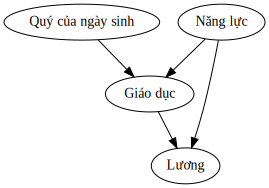

In [65]:
g = gr.Digraph()

g.edge("Năng lực", "Giáo dục")
g.edge("Năng lực", "Lương")
g.edge("Giáo dục", "Lương")
g.edge("Quý của ngày sinh", "Giáo dục")
g

Để tiến hành phân tích, chúng ta cần sử dụng dữ liệu từ ba cuộc tổng điều tra tiến hành mỗi 10 năm, tương tự dữ liệu được sử dụng bởi [Angrist và Krueger](https://economics.mit.edu/faculty/angrist/data1/data/angkru1991) trên bài báo của họ về IV. Bộ dữ liệu này chứa thông tin về log tiền lương (biến kết quả) và số năm học vấn (biến can thiệp). Nó cũng chứa dữ liệu về quý của ngày sinh (biến công cụ), và các biến kiểm soát như năm sinh và nơi sinh. 

In [66]:
data = pd.read_csv("./data/ak91.csv").rename(columns=dict(log_wage='log_lương',
                                                         years_of_schooling='số_năm_học_vấn',
                                                         year_of_birth='năm_sinh',
                                                         quarter_of_birth='quý_sinh',
                                                         state_of_birth ='bang_nơi_sinh'))
data.head()

,log_lương,số_năm_học_vấn,năm_sinh,quý_sinh,bang_nơi_sinh
0,5.790019,12.0,30.0,1.0,45.0
1,5.952494,11.0,30.0,1.0,45.0
2,5.315949,12.0,30.0,1.0,45.0
3,5.595926,12.0,30.0,1.0,45.0
4,6.068915,12.0,30.0,1.0,37.0


# Bước 1

Trước khi chúng ta sử dụng quý của ngày sinh làm biến công cụ, chúng ta cần đảm bảo nó phù hợp. Nghĩa là phải thỏa mãn 2 giả thiết về biến công cụ:

1. \\(Cov(Z, T) \neq 0\\). Điều này nghĩa là chúng ta cần có một bước 1 mạnh, hay biến công cụ thực sự có ảnh hưởng đối với biến can thiệp.
2. \\(Y \perp Z | T \\). Đây là điều kiện loại trừ, nói rằng biến công cụ Z chỉ tác động lên kết quả Y thông qua  can thiệp T. 

Giả thiết đầu tiên may mắn là có thể kiểm chứng. Nhìn vào dữ liệu ta có thể thấy \\(Cov(Z, T)\\) khác 0. Trong ví dụ của chúng ta , nếu quý của ngày sinh thực sự là một biến công cụ như chúng ta vừa nói, chúng ta phải thấy những người sinh vào cuối năm có mức học vấn trung bình hơi cao hơn những người sinh đầu năm. Trước khi tiến hành bất kì kiểm định thống kê nào để kiểm chứng, hãy vẽ đồ thị dữ liệu và quan sát.

In [67]:
group_data = (data
              .groupby(["năm_sinh", "quý_sinh"])
              [["log_lương", "số_năm_học_vấn"]]
              .mean()
              .reset_index()
              .assign(thời_điểm_sinh= lambda d: d["năm_sinh"] + (d["quý_sinh"])/4))

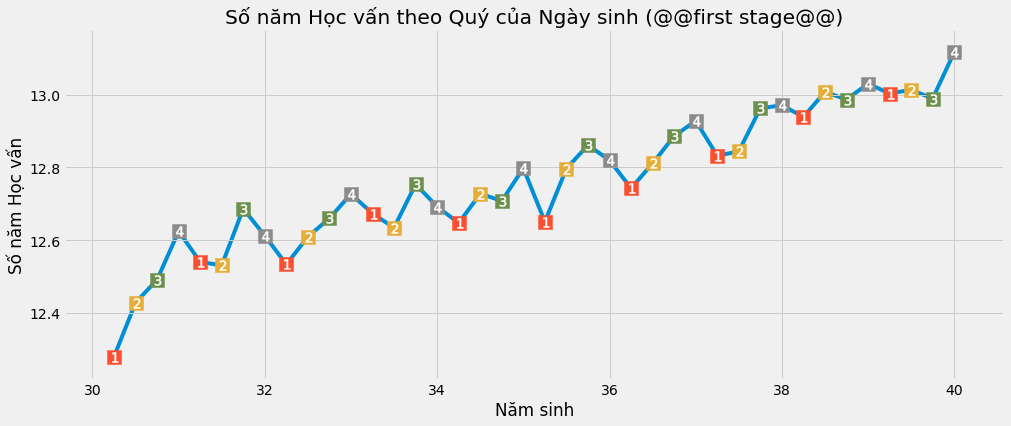

In [68]:
plt.figure(figsize=(15,6))
plt.plot(group_data["thời_điểm_sinh"], group_data["số_năm_học_vấn"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quý_sinh=={q}")["thời_điểm_sinh"]
    y = group_data.query(f"quý_sinh=={q}")["số_năm_học_vấn"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Số năm Học vấn theo Quý của Ngày sinh (bước 1)")
plt.xlabel("Năm sinh")
plt.ylabel("Số năm Học vấn");

Chu kì mùa vụ của số năm học vấn theo quý của ngày sinh rất đáng lưu ý. Trực quan cho thấy những người sinh quý đầu của năm gần như luôn có ít năm học vấn hơn những người sinh quý cuối của năm (nếu chúng ta kiểm soát năm sinh. Sau cùng  những người sinh gần đây thường có nhiều năm học vấn hơn).

Để chắc chắn hơn, chúng ta có thể chạy hồi quy tuyến tính bước 1. Chúng ta sẽ trước hết chuyển đổi quý của ngày sinh thành các biến giả:

In [69]:
factor_data = data.assign(**{f"q{int(q)}": (data["quý_sinh"] == q).astype(int)
                             for q in data["quý_sinh"].unique()})

factor_data.head()

,log_lương,số_năm_học_vấn,...,q3,q4
0,5.790019,12.0,...,0,0
1,5.952494,11.0,...,0,0
2,5.315949,12.0,...,0,0
3,5.595926,12.0,...,0,0
4,6.068915,12.0,...,0,0


Để đơn giản hóa, chúng ta sẽ tạm chỉ dùng quý cuối (q4), làm biến công cụ. Vì thế chúng ta sẽ chạy hồi quy số năm học vấn (can thiệp) theo quý của ngày sinh (biến công cụ). Nó sẽ cho chúng ta biết liệu quý của ngày sinh có tác động dương lên số năm học vấn như chúng ta nhìn thấy phía trên không. Chúng ta cũng sẽ cần kiểm soát năm sinh và chúng ta sẽ bổ sung nơi sinh (bang) vào danh sách biến kiểm soát.

In [70]:
first_stage = smf.ols("số_năm_học_vấn ~ C(năm_sinh) + C(bang_nơi_sinh) + q4", data=factor_data).fit()

print("Ước lượng tham số q4:, ", first_stage.params["q4"])
print("trị số p của q4:, ", first_stage.pvalues["q4"])

Ước lượng tham số q4:,  0.10085809272787274
@@p-value@@ của q4:,  5.464829416593092e-15


Có vẻ như những người sinh vào quý cuối cùng của năm có trung bình 0.1 năm học vấn nhiều hơn những người sinh các quý khác. trị số p gần không. Chúng ta có thể kết luận quý của ngày sinh có tác động đối với số năm học vấn.

![img](./data/img/iv/incomplete-files.png)

# Dạng Tối Giản

Không may là chúng ta không thể kiểm chứng điều kiện thứ hai cho IV. Chúng ta chỉ có thể lập luận để bảo vệ nó. Chúng ta có thể bày tỏ niềm tin rằng quý của ngày sinh không ảnh hưởng gì đến mức thu nhập tiềm năng. Nói cách khác, thời diểm sinh không phải một chỉ dấu của năng lực cá nhân hoặc bất kì nhân tố nào khác có thể chi phối sự khác biệt trong thu nhập bên ngoài hiệu ứng học vấn. Một phương cách tốt để làm như vậy là chúng ta có thể nói rằng quý của ngày sinh đủ tốt như thể được phân bổ ngẫu nhiên khi chúng ta nghĩ về tác động đối với thu nhập. (Thực ra nó không hề ngẫu nhiên. Có những bằng chứng rằng mọi người thường thụ thai vào khoảng cuối mùa hè hoặc quanh các kì nghỉ. Nhưng tôi không thể nghĩ ra một lý do thuyết phục nào về việc quy luật này có thể tác động đến thu nhập nếu không phải thông qua giáo dục).

Sau khi lập luận bảo vệ điều kiện loại trừ, chúng ta có thể tiếp tục chạy hồi quy dạng tối giản. Dạng tối giản nhằm  tìm hiểu biến công cụ tác động thế nào đến kết quả. Vì theo giả thiết tất cả ảnh hưởng này đều thông qua can thiệp, nó sẽ cho ta biết đôi điều về tác động của can thiệp đối với kết quả. Một lần nữa, hãy đánh giá bằng công cụ trực quan trước khi chạy hồi quy một cách chính quy.

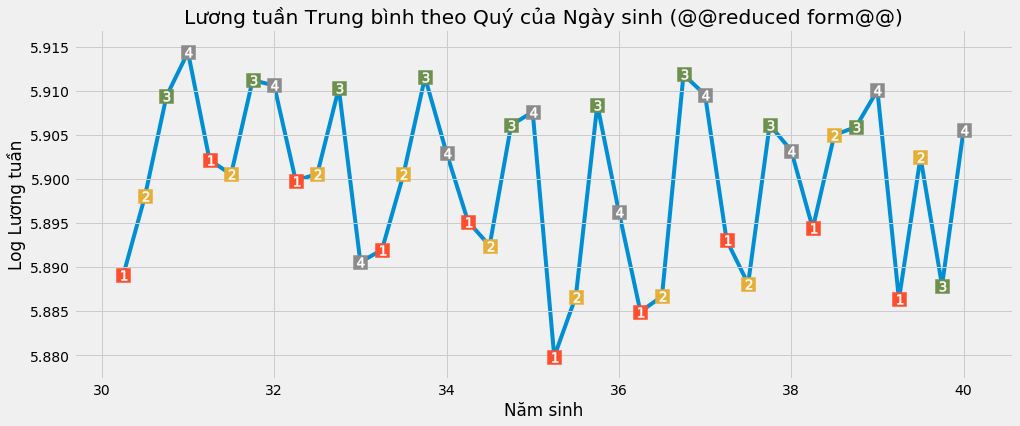

In [71]:
plt.figure(figsize=(15,6))
plt.plot(group_data["thời_điểm_sinh"], group_data["log_lương"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quý_sinh=={q}")["thời_điểm_sinh"]
    y = group_data.query(f"quý_sinh=={q}")["log_lương"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Lương tuần Trung bình theo Quý của Ngày sinh (dạng tối giản)")
plt.xlabel("Năm sinh")
plt.ylabel("Log Lương tuần");

Một lần nữa chúng ta lại có thể thấy chu kì mùa vụ của thu nhập theo quý của năm sinh. Những người sinh cuối năm có thu nhập hơi cao hơn những người sinh đầu năm. Để kiểm định giả thuyết này, chúng ta sẽ chạy lại hồi quy biến công cụ q4 theo log tiền lương. Chúng ta cũng sẽ bổ sung các biến kiểm soát giống như bước 1:

In [72]:
reduced_form = smf.ols("log_lương ~ C(năm_sinh) + C(bang_nơi_sinh) + q4", data=factor_data).fit()
print("Ước lượng tham số q4:, ", reduced_form.params["q4"])
print("trị số p q4:, ", reduced_form.pvalues["q4"])

Ước lượng tham số q4:,  0.008603484260143762
@@p-value@@ q4:,  0.0014949127183588001


Một lần nữa, chúng ta thu được kết quả có ý nghĩa. Những người sinh vào quý cuối năm có mức lương bình quân cao hơn 0.8% so với những người khác. Lần này trị số p  không gần 0  như trước nữa, nhưng vẫn có ý nghĩa thông kê, và là 0.0015. 

# Tính toán Biến Công Cụ bằng tay 

Nắm trong tay cả dạng tối giản và bước 1, chúng ta có thể chia tác động của dạng tối giản cho bước 1. Vì hệ số bước 1 rơi vào khoảng 0.1, nó sẽ nhân tác động của dạng tối giản lên khoảng 10 lần. Ta sẽ thu được ước lượng IV không thiên lệch của tác động nhân quả trung bình:

$
ATE_{IV} = \dfrac{\text{Dạng Tối Giản (hệ số)}}{\text{Bước 1 (hệ số)}} 
$

In [73]:
reduced_form.params["q4"] / first_stage.params["q4"]

0.0853028649208844

Điều này nghĩa là chúng ta nên kì vọng mỗi năm học vấn tăng tiền lương thêm 8%.

Một cách khác để thu ước lượng IV là sử dụng hồi quy hai bước tối thiểu, **2SLS**. Với quy trình này, chúng ta sẽ thực hiện bước 1 giống trên đây và thực hiện bước 2 bằng cách thay biến can thiệp bằng giá trị hồi quy của bước 1
 
$
HọcVấn_i = \gamma_0 + \gamma_1 * q4_i + \gamma_2 NămSinh_i + \gamma_3 NơiSinh_i + v_i
$

$
log(Lương)_i = \beta_0 + \beta_1 HọcVấn_i + \beta_2 NămSinh_i + \beta_3 NơiSinh_i + u_i
$

$
log(Lương)_i = \beta_0 + \beta_1 [\gamma_0 + \gamma_1 * q4_i + \gamma_2  NămSinh_i + \gamma_3 NơiSinh_i + v_i ]  + \beta_2 NămSinh_i + \beta_3 NơiSinh_i + u_i
$

Điều chúng ta cần lưu ý là  **bất kì biến kiểm soát nào được đưa vào bước 1 cũng cần phải đưa vào bước 2 khi sử dụng IV**. 

In [74]:
iv_by_hand = smf.ols("log_lương ~ C(năm_sinh) + C(bang_nơi_sinh) + số_năm_học_vấn_dự_đoán",
                     data=factor_data.assign(số_năm_học_vấn_dự_đoán=first_stage.fittedvalues)).fit()

iv_by_hand.params["số_năm_học_vấn_dự_đoán"]

0.08530286492037109

Có thể thấy các tham số không đổi. Phương thức thứ hai để xử lý IV này khá hữu ích cho trực giác. Với 2SLS, bước 1 tạo ra một phiên bản của can thiệp miễn nhiễm thiên lệch thiếu biến. Sau đó, chúng ta sử dụng phiên bản miễn nhiễm này của can thiệp, các giá trị hồi quy của bước 1, trong một hồi quy tuyến tính.

Trong thực tế, chúng ta không tính IV bằng tay. Không phải chỉ vì nó quá cồng kềnh, mà còn bởi nó không cho ta biết các sai số chuẩn. Thay vào đó, chúng ta hãy để máy tính làm thay mình. Chúng ta có thể sử dụng thư viện Python [linearmodels](https://bashtage.github.io/linearmodels/) để chạy 2SLS đúng cách.

Công thức hơi khác một chút. Chúng ta cần đưa vào công thức  bước 1 và đặt nó giữa  \[ \]. Trong trường hợp này, chúng ta đưa vào `số_năm_học_vấn ~ q4`. Không cần đưa các biến kiểm soát vào bước 1 vì máy tính sẽ tự động làm vậy nếu chúng ta đưa chúng vào bước 2. Vì thế, chúng ta đưa `năm_sinh` và `bang_nơi_sinh` ra ngoài công thức bước 1. 

In [75]:
from linearmodels.iv import IV2SLS

def parse(model, exog="số_năm_học_vấn"):
    param = model.params[exog]
    se = model.std_errors[exog]
    p_val = model.pvalues[exog]
    print(f"Parameter: {param}")
    print(f"SE: {se}")
    print(f"95 CI: {(-1.96*se,1.96*se) + param}")
    print(f"P-value: {p_val}")
    
formula = 'log_lương ~ 1 + C(năm_sinh) + C(bang_nơi_sinh) + [số_năm_học_vấn ~ q4]'
iv2sls = IV2SLS.from_formula(formula, factor_data).fit()
parse(iv2sls)

Parameter: 0.08530286492123196
SE: 0.02554081281112822
95 CI: [0.03524287 0.13536286]
P-value: 0.0008381914649722155


Một lần nữa chúng ta lại thấy hệ số giống như các hệ số chúng ta thu được ở trên. Không những thế, chúng ta còn thu được các sai số chuẩn phù hợp. Chúng ta có thể nói chúng ta kì vọng 1 năm học vấn tăng mức lương bình quân thêm 8.5%.

# Đa Biến Công Cụ

Một lợi ích khác của việc sử dụng máy tính là ta có thể dùng 2SLS với nhiều biến công cụ. Trong một ví dụ khác, chúng ta sử dụng tất cả các biến giả cho quý của ngày sinh để làm biến công cụ cho số năm học vấn. 

In [76]:
formula = 'log_lương ~ 1 + C(năm_sinh) + C(bang_nơi_sinh) + [số_năm_học_vấn ~ q1+q2+q3]'
iv_many_zs = IV2SLS.from_formula(formula, factor_data).fit()
parse(iv_many_zs)

Parameter: 0.10769370489333596
SE: 0.019557149010635332
95 CI: [0.06936169 0.14602572]
P-value: 3.657974678716869e-08


Với 3 biến giả, ước lượng cho lợi ích của giáo dục là 0.1, nghĩa là chúng ta nên kì vọng mức tăng lương 10% cho mỗi năm học vấn tăng thêm. Hãy so sánh nó với ước lượng OLS truyền thống. Muốn thế, chúng ta có thể dùng lại 2SLS  mà không có bước 1. 

In [78]:
formula = "log_lương ~ số_năm_học_vấn + C(bang_nơi_sinh) + C(năm_sinh) + C(quý_sinh)"
ols = IV2SLS.from_formula(formula, data=data).fit()
parse(ols)

Parameter: 0.06732572817657712
SE: 0.0003883998439048615
95 CI: [0.06656446 0.06808699]
P-value: 0.0


Lợi ích của giáo dục được ước lượng nhỏ hơn trong mô hình OLS so với 2SLS. Thêm nữa hãy để ý các khoảng tin cậy. 2SLS có CI lớn hơn nhiều so với OLS estimate. Hãy tìm hiểu vấn đề này kĩ hơn.

# Điểm yếu của Biến công cụ

![img](./data/img/iv/weak-iv.png)

Khi sử dụng IV, cần nhớ rằng chúng ta đang ước lượng ATE một cách gián tiếp. Ước lượng của chúng ta phục thuộc cả vào bước 1 và bước 2. Nếu tác động của can thiệp đối với kết quả thực sự mạnh, bước 2 cũng sẽ mạnh. Nhưng bước 2 mạnh thế nào sẽ chẳng còn quan trọng, nếu chúng ta chỉ có một bước 1 yếu. Bước 1 yếu nghĩa là biến công cụ tương quan rất yếu với can thiệp. Khi đó, chúng ta không thể tìm hiểu được nhiều về can thiệp từ biến công cụ.

Công thức tính sai số chuẩn cho IV khá phức tạp và khó hiểu bằng trực giác, nên chúng ta cần công cụ khác để hiểu vấn đề. Chúng ta sẽ mô phỏng dữ liệu với can thiệp có tác động 2.0 đối với kết quả Y, một biễn nhiễu vắng mặt U và kiểm soát X. Chúng ta sẽ mô phỏng đa biến công cụ với độ mạnh khác nhau trong bước 1.

$
X \sim N(0, 2^2)\\
U \sim N(0, 2^2)\\
T \sim N(1+0.5U, 5^2)\\
Y \sim N(2+ X - 0.5U + 2T, 5^2)\\
Z \sim N(T, \sigma^2) \text{ với }\sigma^2 \text{ chạy từ 0.1 đến 100}
$

In [79]:
np.random.seed(12)
n = 10000
X = np.random.normal(0, 2, n) # observable variable
U = np.random.normal(0, 2, n) # unobservable (omitted) variable
T = np.random.normal(1 + 0.5*U, 5, n) # treatment
Y = np.random.normal(2 + X - 0.5*U + 2*T, 5, n) # outcome

stddevs = np.linspace(0.1, 100, 50)
Zs = {f"Z_{z}": np.random.normal(T, s, n) for z, s in enumerate(stddevs)} # instruments with decreasing Cov(Z, T)

sim_data = pd.DataFrame(dict(U=U, T=T, Y=Y)).assign(**Zs)

sim_data.head()

,U,T,...,Z_48,Z_49
0,2.696148,8.056988,...,-117.798705,-13.485292
1,2.570240,0.245067,...,-209.727577,-70.792948
2,0.664741,5.597510,...,60.562232,47.619414
3,1.037725,0.493532,...,78.136513,-108.322304
4,-2.590591,-6.263014,...,78.776566,-80.547214


Hãy kiểm tra chút, chúng ta có thể thấy tương quan giữa Z và T is giảm dần (khi phương sai Z tăng).

In [80]:
corr = (sim_data.corr()["T"]
        [lambda d: d.index.str.startswith("Z")])

corr.head()

Z_0    0.999807
Z_1    0.919713
Z_2    0.773434
Z_3    0.634614
Z_4    0.523719
Name: T, dtype: float64

Bây giờ chúng ta sẽ chạy mô hình IV cho mỗi biến công cụ chúng ta có và thu thập ước lượng và sai số chuẩn của ATE.

In [81]:
se = []
ate = []
for z in range(len(Zs)):
    formula = f'Y ~ 1 + X + [T ~ Z_{z}]'
    iv = IV2SLS.from_formula(formula, sim_data).fit()
    se.append(iv.std_errors["T"])
    ate.append(iv.params["T"])

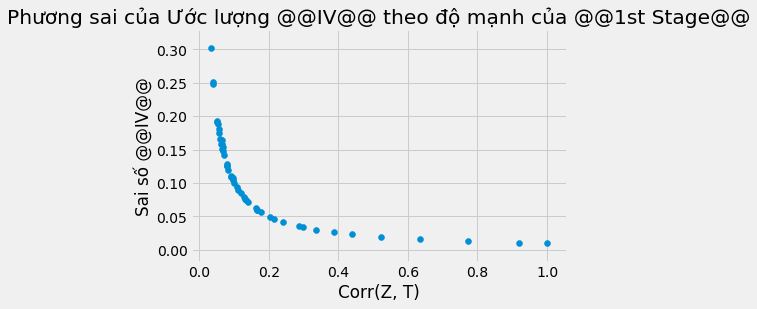

In [83]:
plot_data = pd.DataFrame(dict(se=se, ate=ate, corr=corr)).sort_values(by="corr")

plt.scatter(plot_data["corr"], plot_data["se"])
plt.xlabel("Corr(Z, T)")
plt.ylabel("Sai số IV");
plt.title("Phương sai của Ước lượng IV theo độ mạnh của Bước 1");

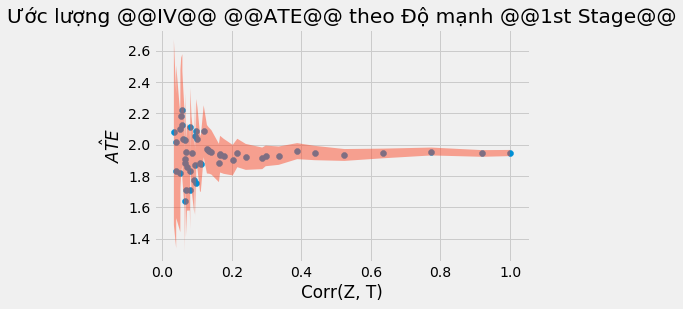

In [84]:
plt.scatter(plot_data["corr"], plot_data["ate"])
plt.fill_between(plot_data["corr"],
                 plot_data["ate"]+1.96*plot_data["se"],
                 plot_data["ate"]-1.96*plot_data["se"], alpha=.5)
plt.xlabel("Corr(Z, T)")
plt.ylabel("$\hat{ATE}$");
plt.title("Ước lượng IV ATE theo Độ mạnh Bước 1");

Chúng ta có thể thấy ở các đồ thị trên, các ước lượng biến động mạnh khi quan hệ tương quan giữa T và  Z yếu. Đó là do SE tăng mạnh khi quan hệ tương quan yếu.

Một điểm đáng lưu ý khác là ước lượng **2SLS thiên lệch**! Cả khi có quan hệ tương quan cao, ước lượng hệ số không đạt giá trị thực 2.0 của ATE. Thực tế, 2.0 không nằm trong CI 95%! 2SLS chỉ vững, nghĩa là nó tiệm cận tham số thực nếu kích thước mẫu đủ lớn. Tuy nhiên chúng ta không thể biết lớn thế nào là đủ. Chúng ta chỉ có thể dựa vào một số kinh nghiệm để hiểu về hướng vận động của thiên lệch:
1. 2SLS chệch về phía OLS. Nghĩa là nếu OLS có thiên lệch âm hoặc dương, 2SLS cũng sẽ như thế. Lợi ích của 2SLS là ít  nhất nó vững, còn OLS thì không, trong trường hợp của biến thiếu. Trong ví dụ trên, biến không quan sát được U tác động tiêu cực đến kết quả nhưng tương quan dương với can thiệp, và dẫn đến thiên lệch âm. Điều này giải thích vì sao ước lượng ATE thấp hơn giá trị thực (thiên lệch âm).

2. Thiên lệch sẽ tăng khi ta thêm biến công cụ. Nếu ta thêm quá nhiều biến công cụ, 2SLS sẽ càng giống OLS.

Bên cạnh việc hiểu về hướng thiên lệch, lời khuyên cuối cùng của tôi là tránh **những sai lầm phổ biến khi sử dụng IV**:

1. Tính toán IV bằng tay. Như chúng ta thấy, tính toán IV bằng tay sẽ cho kết quả sai số chuẩn không chính xác, kể cả nếu ước lượng hệ số đúng. Cả khi nếu SE không hoàn toàn vô dụng, thì tại sao tính bằng tay nếu phần mềm có thể giúp bạn tính SE đúng?

2. Sử dụng bất cứ thứ gì khác ngoài OLS cho bước 1. Rất nhiều Chuyên Gia Dữ Liệu khi đối mặt với IV nghĩ rằng họ có thể cải tiến nó. Ví dụ họ thấy một  can thiệp nhị phân và nghĩ về việc thay thế bước 1 bằng một hồi quy lô-gít vì nghĩ rằng họ đang dự đoán một biến giả. Vấn đề là điều này hoàn toàn sai. Tính vững của IV dựa vào thuộc tính mà chỉ OLS mới đảm bảo, đó là trực giao của phần dư, nên bất cứ điều gì khác ngoài OLS khi chạy bước 1 sẽ đều dẫn đến thiên lệch. (Hiện đang có một số kĩ thuật mới sử dụng Học Máy cho IV, nhưng kết quả của chúng, dù đánh giá tích cực nhất, vẫn còn đặt ra rất nhiều câu hỏi).

# Ý tưởng chủ đạo

Chúng ta đã dành thời gian để hiểu cách khắc phục thiên lệch thiếu biến nếu chúng ta có biến công cụ. Biến công cụ là biến có tương quan với can thiệp (bước 1), nhưng chỉ tác động đến kết quả thông qua can thiệp (điều kiện loại trừ). Chúng ta đã thấy một ví dụ về biến công cụ với quý của ngày sinh để ước lượng tác động của giáo dục đối với thu nhập.

Khi chúng ta đi sâu vào cơ chế ước lượng tác động nhân quả với IV bằng 2SLS. Chúng ta cũng thấy rằng IV không phải giải pháp thần kì. Nó có thể khá phiền toái nếu chúng ta có bước 1 yếu. Hơn nữa, dù 2SLS vững, nó vẫn là một phương pháp thiên lệch để ước lượng tác động nhân quả. 

# Tài liệu tham khảo

Tôi muốn dành loạt bài viết này để tri ân Joshua Angrist, Alberto Abadie and Christopher Walters vì khóa học Kinh tế lượng tuyệt cú mèo của họ. Phần lớn ý tưởng trong loạt bài này được lấy từ các bài giảng của họ được tổ chức bởi Hiệp hội Kinh tế Mĩ.  Theo dõi các bài giảng này là những gì tôi làm trong suốt năm 2020 khó nhằn.
* [Kinh tế lượng với dữ liệu chéo](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Luyện chưởng Kinh tế lượng Gần như Vô hại](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

Tôi cũng muốn giới thiệu cuốn sách lý thú của Angrist. Chúng cho tôi thấy Kinh tế lượng, hoặc 'Lượng theo cách họ gọi không chỉ vô cùng hữu ích mà còn rất vui.

* [Kinh tế lượng Gần như Vô hại](https://www.mostlyharmlesseconometrics.com/)
* [Luyện chưởng 'Lượng](https://www.masteringmetrics.com/)

Tài liệu tham khảo cuối cùng của tôi là cuốn sách của Miguel Hernan and Jamie Robins. Nó là người bạn đồng hành tin cậy với tôi khi trả lời những câu hỏi nhân quả khó nhằn.

* [Sách Suy Luận Nhân Quả](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)




# Bảng Từ Viết tắt 
|Viết tắt| Tiếng Anh | Tiếng Việt |
| --- | --- | --- | 
|2SLS|Two-Stage least square|Bình phương Tối thiểu Hai bước| 
|ATE|Average Treatment Effect|Tác động Can thiệp Trung bình| 
|CI|Confidence Interval|Khoảng tin cậy| 
|IV|Instrumental Variable|Biến Công cụ| 
|OVB|Omitted Variable Bias|Thiên Lệch Thiếu Biến| 
|SE|Standard Error|Sai số chuẩn| 


# Bảng Thuật ngữ 
| Thuật ngữ | Tiếng Anh |
| --- | --- | 
|biến|variable| 
|biến can thiệp|treatment variable| 
|biến công cụ|instrumental-variable, instrumental variable, instrument, instrument variable| 
|biến giả|dummy, dummy variable| 
|biến kết quả|outcome variable| 
|biến nhiễu|confounder, confounding variable| 
|biến thiếu|omitted variables, omitted variable| 
|biến đại diện|proxy, surrogate variable| 
|biễn nhiễu vắng mặt|unobserved confounder| 
|bước 1|1st-stage, first stage, 1st stage| 
|bước 2|second stage| 
|can thiệp nhị phân|binary treatment, dummy treatment| 
|chu kì mùa vụ|seasonal pattern| 
|chuyên gia dữ liệu|data scientist| 
|chệch|biased| 
|có tương quan|correlated| 
|dạng tối giản|reduced form, reduced-form| 
|dữ liệu|data| 
|dự đoán|predict, prediction| 
|giá trị hồi quy|fitted value| 
|giả thiết|assumption| 
|gây nhiễu|confound| 
|hiệp phương sai|covariance| 
|hệ số hồi quy|regression coefficient| 
|học máy|machine learning| 
|hồi quy|regression, regress| 
|hồi quy hai bước tối thiểu|2 stages least squares| 
|hồi quy lô-gít|logistic regression| 
|hồi quy tuyến tính|linear regression| 
|khoảng tin cậy|confidence interval| 
|không thiên lệch|unbiased| 
|kinh tế lượng|econometrics| 
|kiểm định giả thuyết|test hypothesis| 
|kiểm định thống kê|statistical test| 
|kích thước mẫu|sample size| 
|kết quả|outcome| 
|kết quả có ý nghĩa|significant result| 
|mô hình|model| 
|mô hình hồi quy tuyến tính|linear regression model| 
|mô hình ước lượng wald|wald estimator| 
|mô phỏng|simulate| 
|mẫu số|denominator| 
|ols|ols| 
|phương pháp thiên lệch|biased method| 
|phương sai|variance| 
|phương trình|equation| 
|phương trình lí tưởng|ideal equation| 
|phần dư|error term, residual| 
|quan hệ tương quan|association, correlation| 
|sai số chuẩn|standard error| 
|suy luận nhân quả|causal inference, causal reasoning| 
|tham số|parameter| 
|tham số thực|true parameter, argument| 
|thiên lệch|bias| 
|thiên lệch thiếu biến|omitted variable bias| 
|thiên lệch âm|negative bias| 
|trị số p|p-value| 
|tác động|impact| 
|tác động nhân quả trung bình|average causal effect| 
|tính vững|consistency| 
|tử số|numerator| 
|vững|consistent| 
|đa biến công cụ|multiple-instrument, multiple instrument| 
|điều kiện loại trừ|exclusion restriction| 
|đạo hàm riêng|partial derivative| 
|ước lượng hệ số|parameter estimate| 
|ước lượng iv|iv estimate| 
